# ภูรี ลิ้มวงศ์รุจิรัตน์ 6510450844

# ปริยวิศว์ เตชะกฤตเมธีธำรง 6510450593

# ณัฐดนัย เอกสันติ 6510450330

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('UK_Accident.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.set_index('Accident_Index')
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
2.01193E+12,335470.0,731140.0,-3.048961,56.468009,93,3,1,1,11/08/2011,5,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,NaN,2011
200734NW55637,489820.0,269620.0,-0.683714,52.317310,34,3,2,1,09/11/2007,6,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01027334,2007
20141312L1344,406039.0,441522.0,-1.909646,53.869872,13,3,2,1,21/02/2014,6,...,Central refuge,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,NaN,1,No,E01010728,2014
2.01136E+12,649820.0,305140.0,1.686588,52.586573,36,3,1,1,11/01/2011,3,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Wet/Damp,NaN,NaN,2,Yes,E01026614,2011
201401XH30731,511080.0,187710.0,-0.398383,51.577267,1,3,3,1,11/11/2014,3,...,No physical crossing within 50 meters,Daylight: Street light present,Unknown,Wet/Damp,NaN,NaN,1,No,E01002417,2014


## รายละเอียดของชุดข้อมูล

### คำอธิบายข้อมูลในแต่ละ column

<table>
  <tr>
    <th>Columns</th>
    <th>คำอธิบาย</th>
  </tr>
  <tr>
    <td>Accident_Severity</td>
    <td>ความรุนแรงของการเกิดอุบัติเหตุระดับตั้งแต่ 1 - 5</td>
  </tr>
  <tr>
    <td>Carriageway_Hazards</td>
    <td>มีการขนสารกัมมันตรังสี</td>
  </tr>
    <tr>
    <td>Did_Police_Officer_Attend_Scene_of_Accident</td>
    <td>เจ้าหน้าที่ตำรวจเข้าร่วมที่เกิดเหตุหรือไม่</td>
  </tr>
  <tr>
    <td>Junction_Control</td>
    <td>รูปแบบการควบคุมทางแยก</td>
  </tr>
    <tr>
    <td>Light_Conditions</td>
    <td>สภาพของแสงสว่างตอนเกิดอุบัติเหตุ</td>
  </tr>
  <tr>
    <td>Number_of_Casualties</td>
    <td>จำนวนผู้เสียในอุบัติเหตุนั้น</td>
  </tr>
  <tr>
    <td>Number_of_Vehicles</td>
    <td>จำนวนรถที่เกิดในอุบัติเหตุนั้น</td>
  </tr>
  <tr>
    <td>Pedestrian_Crossing-Physical_Facilities</td>
    <td>สิ่งอำนวยความสะดวกบนทางเท้า</td>
  </tr>
  <tr>
    <td>Pedestrian_Crossing-Human_Control</td>
    <td>ที่ควบคุมเวลาเดินข้ามฝั่ง</td>
  </tr>
    <tr>
    <td>police_fore</td>
    <td>กำลังตำรวจที่เข้าไปช่วยเหลือตอนเกิดอุบัติเหตุ </td>
  </tr>
  <tr>
    <td>Road_Surface_Conditions</td>
    <td>สภาพพื้นผิวถนน</td>
  </tr>
  <tr>
    <td>Road_Type</td>
    <td>ประเภทของถนน</td>
  </tr>
  <tr>
    <td>Special_Conditions_at_Site</td>
    <td>เงื่อนไขพิเศษในที่เกิดเหตุ</td>
  </tr>
  <tr>
    <td>Speed_limit</td>
    <td>ความเร็วจำกัดของถนน</td>
  </tr>
  <tr>
    <td>Urban_or_Rural_Area</td>
    <td>เขตเมืองหรือชนบท</td>
  </tr>
  <tr>
    <td>Weather_Conditions</td>
    <td>สภาพของอากาศตอนเกิดอุบัติเหตุ</td>
  </tr>
</table>


### จำนวน rows และ columns 

In [4]:
df.dropna(subset=['Longitude', 'Time', 'Pedestrian_Crossing-Human_Control', 
                  'Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [5]:
print("Number of rows: ", df.shape[0],
     "\nNumber of columns: ", df.shape[1])

Number of rows:  1503890 
Number of columns:  31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503890 entries, 200501BS00001 to 2.01E+12
Data columns (total 31 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Location_Easting_OSGR                        1503890 non-null  float64
 1   Location_Northing_OSGR                       1503890 non-null  float64
 2   Longitude                                    1503890 non-null  float64
 3   Latitude                                     1503890 non-null  float64
 4   Police_Force                                 1503890 non-null  int64  
 5   Accident_Severity                            1503890 non-null  int64  
 6   Number_of_Vehicles                           1503890 non-null  int64  
 7   Number_of_Casualties                         1503890 non-null  int64  
 8   Date                                         1503890 non-null  object 
 9   Day_of_Week                           

### column ที่มี null

In [7]:
df.isna().any()

Location_Easting_OSGR                          False
Location_Northing_OSGR                         False
Longitude                                      False
Latitude                                       False
Police_Force                                   False
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Date                                           False
Day_of_Week                                    False
Time                                           False
Local_Authority_(District)                     False
Local_Authority_(Highway)                      False
1st_Road_Class                                 False
1st_Road_Number                                False
Road_Type                                      False
Speed_limit                                    False
Junction_Control                                True
2nd_Road_Class                                

In [8]:
df.isna().sum()

Location_Easting_OSGR                                0
Location_Northing_OSGR                               0
Longitude                                            0
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                                 0
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                602694
2nd_Road_C

### แทนที่ค่า NULL และ ค่า Duplicated

In [9]:
dup_rows = df[df.duplicated()]
print("Number of duplicate rows: ", dup_rows.shape[0])

df.drop_duplicates(inplace=True)
print("Number of rows remaining: ", df.shape[0])

Number of duplicate rows:  34167
Number of rows remaining:  1469723


## ประเภทและเนื้อหาของข้อมูล

### NUMBER

In [10]:
df.describe(include='number')

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06,1.469723e+06
mean,4.399051e+05,2.986402e+05,-1.432531e+00,5.257566e+01,3.077645e+01,2.838776e+00,1.831865e+00,1.350914e+00,4.118635e+00,3.535205e+02,4.089777e+00,1.008853e+03,3.907809e+01,2.664063e+00,3.801138e+02,1.356605e+00,2.009309e+03
std,9.553398e+04,1.612215e+05,1.404302e+00,1.451720e+00,2.551236e+01,4.014211e-01,7.152280e-01,8.258342e-01,1.924716e+00,2.592345e+02,1.429888e+00,1.821619e+03,1.417093e+01,3.207775e+00,1.300941e+03,4.790465e-01,3.021106e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.757600e+05,1.780000e+05,-2.363448e+00,5.148788e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.220000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.409400e+05,2.653070e+05,-1.391488e+00,5.227635e+01,3.100000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.280000e+02,4.000000e+00,1.290000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.232900e+05,3.965800e+05,-2.184340e-01,5.346421e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.310000e+02,6.000000e+00,7.260000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [11]:
numerical_data = df.select_dtypes(include='number')
len(numerical_data.columns)

17

### OBJECT

In [12]:
df.describe(include='object')

,Date,Time,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
count,1469723,1469723,1469723,1469723,878053,1469723,1469723,1469723,1469723,1469723,35917,26767,1469723,1361690
unique,3286,1439,207,6,4,3,6,5,9,6,7,5,2,35452
top,21/10/2005,17:00,E10000016,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,Other object in carriageway,Yes,E01000004
freq,822,14406,40390,1100472,715642,1461079,1225265,1077121,1176472,1011348,16913,11549,1190065,2074


In [13]:
categorical_data = df.select_dtypes(include='object')
len(categorical_data.columns)

14

In [14]:
print(str(len(numerical_data.columns)) + ' number columns\n' +
      str(len(categorical_data.columns)) + ' object columns')

17 number columns
14 object columns


## จำนวนรถและคนเสียชีวิตจากอุบัติเหตุตามวัน

In [15]:
days = df.groupby('Day_of_Week')[['Number_of_Casualties']].sum()
days = days.reset_index()
days.sort_values(by='Number_of_Casualties', ascending=False)

,Day_of_Week,Number_of_Casualties
5,6,324414
4,5,291853
3,4,290846
2,3,287667
6,7,279003
1,2,277587
0,1,234099


In [16]:
vehicles = df.groupby('Day_of_Week')[['Number_of_Vehicles']].sum()
vehicles = vehicles.reset_index()
vehicles.sort_values(by='Number_of_Vehicles', ascending=False)

,Day_of_Week,Number_of_Vehicles
5,6,446441
3,4,409284
4,5,408807
2,3,405480
1,2,384296
6,7,350950
0,1,287076


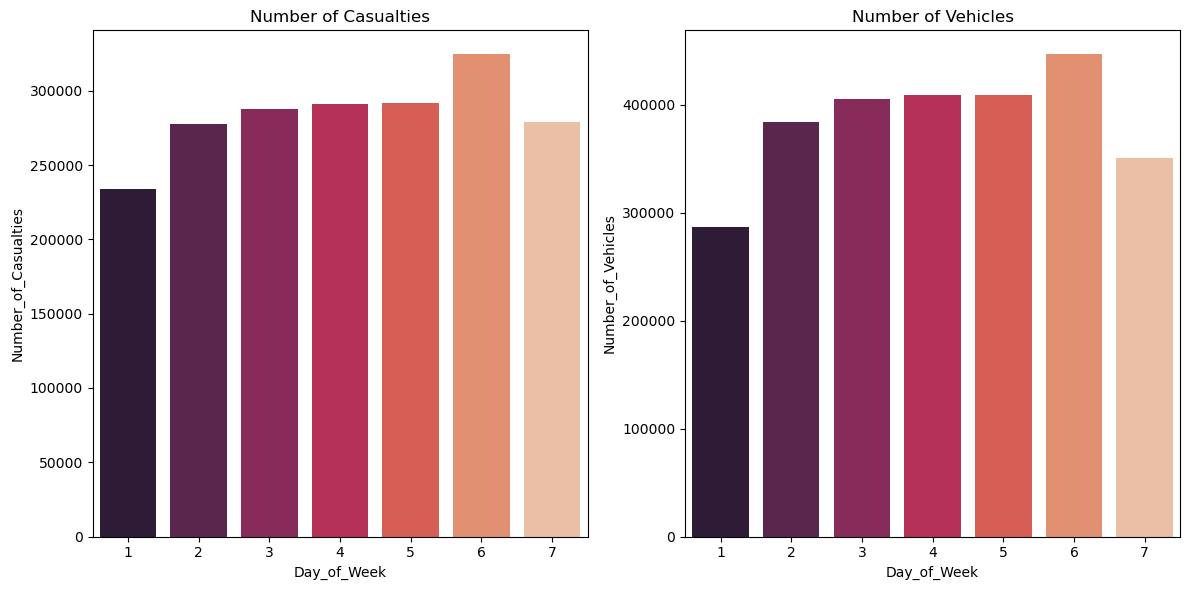

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=days, x='Day_of_Week', y='Number_of_Casualties', palette='rocket', ax=axs[0])
axs[0].set_title('Number of Casualties')

sns.barplot(data=vehicles, x='Day_of_Week', y='Number_of_Vehicles', palette='rocket', ax=axs[1])
axs[1].set_title('Number of Vehicles')

plt.tight_layout()
plt.show()

## อัตราการเสียชีวิตเมื่อเทียบกับสภาพอากาศ

In [18]:
casualties_by_weather = df.groupby('Weather_Conditions')[['Number_of_Casualties']].sum()

weather_counts = df['Weather_Conditions'].value_counts()
# หารด้วยจำนวนข้อมูลของแต่ละสภาพอากาศ เพื่อความเท่าเทียมของอัตราส่วน
normalized_casualties = casualties_by_weather['Number_of_Casualties'] / weather_counts
normalized_casualties = normalized_casualties.drop(['Other', 'Unknown'])
normalized_casualties = normalized_casualties.sort_values(ascending=False)
normalized_casualties

Weather_Conditions
Fog or mist                   1.439891
Snowing with high winds       1.421325
Raining with high winds       1.396522
Raining without high winds    1.393932
Fine with high winds          1.374150
Fine without high winds       1.345457
Snowing without high winds    1.343088
dtype: float64

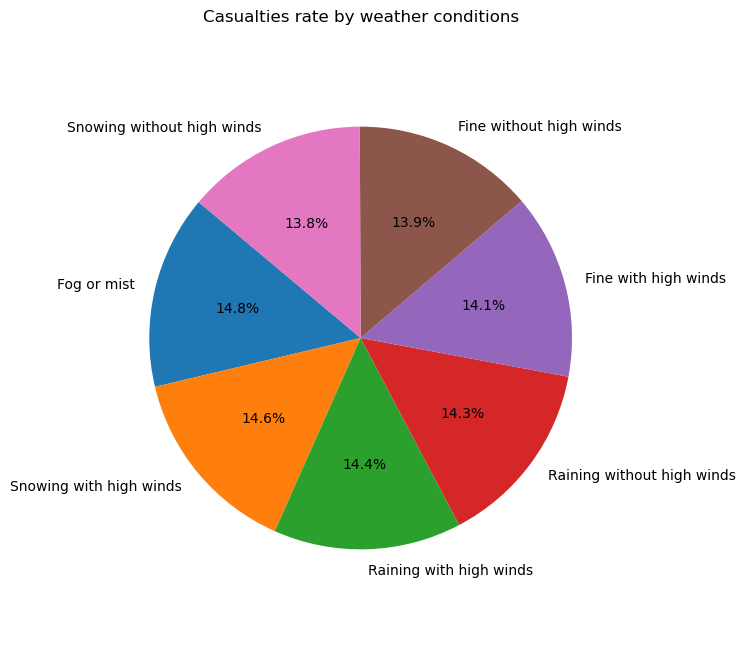

In [19]:
plt.figure(figsize=(6, 8))
plt.pie(normalized_casualties, labels=normalized_casualties.index, autopct='%1.1f%%', startangle=140)
plt.title('Casualties rate by weather conditions')
plt.axis('equal')
plt.show()

## อัตราการเสียชีวิตเมื่อเทียบกับสภาพแสงไฟบนถนน

In [20]:
casualties_by_lights = df.groupby('Light_Conditions')[['Number_of_Casualties']].sum()

light_counts = df['Light_Conditions'].value_counts()

normalized_casualties = casualties_by_lights['Number_of_Casualties'] / light_counts
normalized_casualties = normalized_casualties.drop(['Darkness: Street lighting unknown'])
normalized_casualties = normalized_casualties.sort_values(ascending=False)
normalized_casualties

Light_Conditions
Darkeness: No street lighting                1.539082
Darkness: Street lights present and lit      1.352827
Darkness: Street lights present but unlit    1.343153
Daylight: Street light present               1.336881
dtype: float64

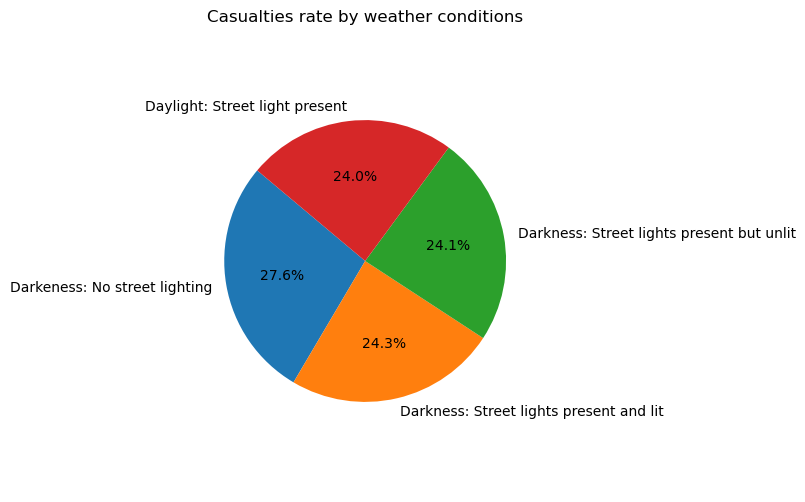

In [21]:
plt.figure(figsize=(4, 6))
plt.pie(normalized_casualties, labels=normalized_casualties.index, autopct='%1.1f%%', startangle=140)
plt.title('Casualties rate by weather conditions')
plt.axis('equal')
plt.show()

## ค่าเฉลี่ยการเสียชีวิตเทียบกับการจำกัดความเร็ว

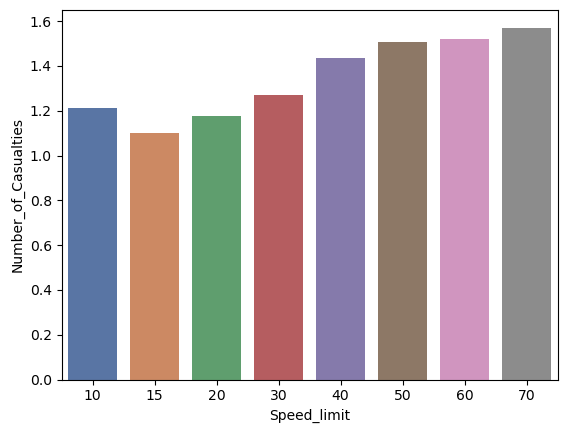

In [22]:
speed = df.groupby('Speed_limit')['Number_of_Casualties'].mean().reset_index()
sns.barplot(x='Speed_limit', y='Number_of_Casualties', data=speed, palette='deep')
plt.show()

## ค่าเฉลี่ยคนเสียชีวิตเทียบกับประเภทถนน

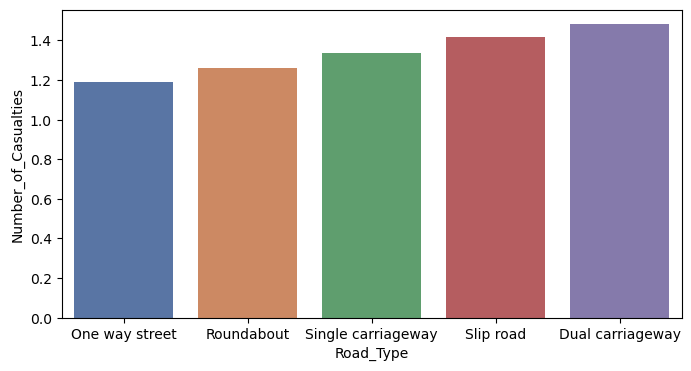

In [29]:
plt.figure(figsize=(8, 4))
road = df.groupby('Road_Type')['Number_of_Casualties'].mean().drop('Unknown').reset_index()
road = road.sort_values(by='Number_of_Casualties')  # Specify the column to sort by
sns.barplot(data=road, x='Road_Type', y='Number_of_Casualties', palette='deep')
plt.show()